#### Performing EDA and Building a  Simple Model.

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
sns.set(style="ticks")
import matplotlib.pyplot as plot

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from scipy.stats import zscore

### Loading Dataset

In [164]:
Th=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [165]:
Th.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Reading  column description

In [166]:
Th.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [167]:
Th.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [168]:
Th.head(2)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [169]:
Th.shape

(5000, 14)

In [170]:
Th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Checking Null value

In [171]:

Th.apply(lambda x : sum(x.isnull()))

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

No columns have null data in the file

### Checking unique data

In [172]:
Th.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

In [173]:
Th.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Min experience is showing negative values, which is incorrect, so we have to clean that column

### Data distribution chart

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0


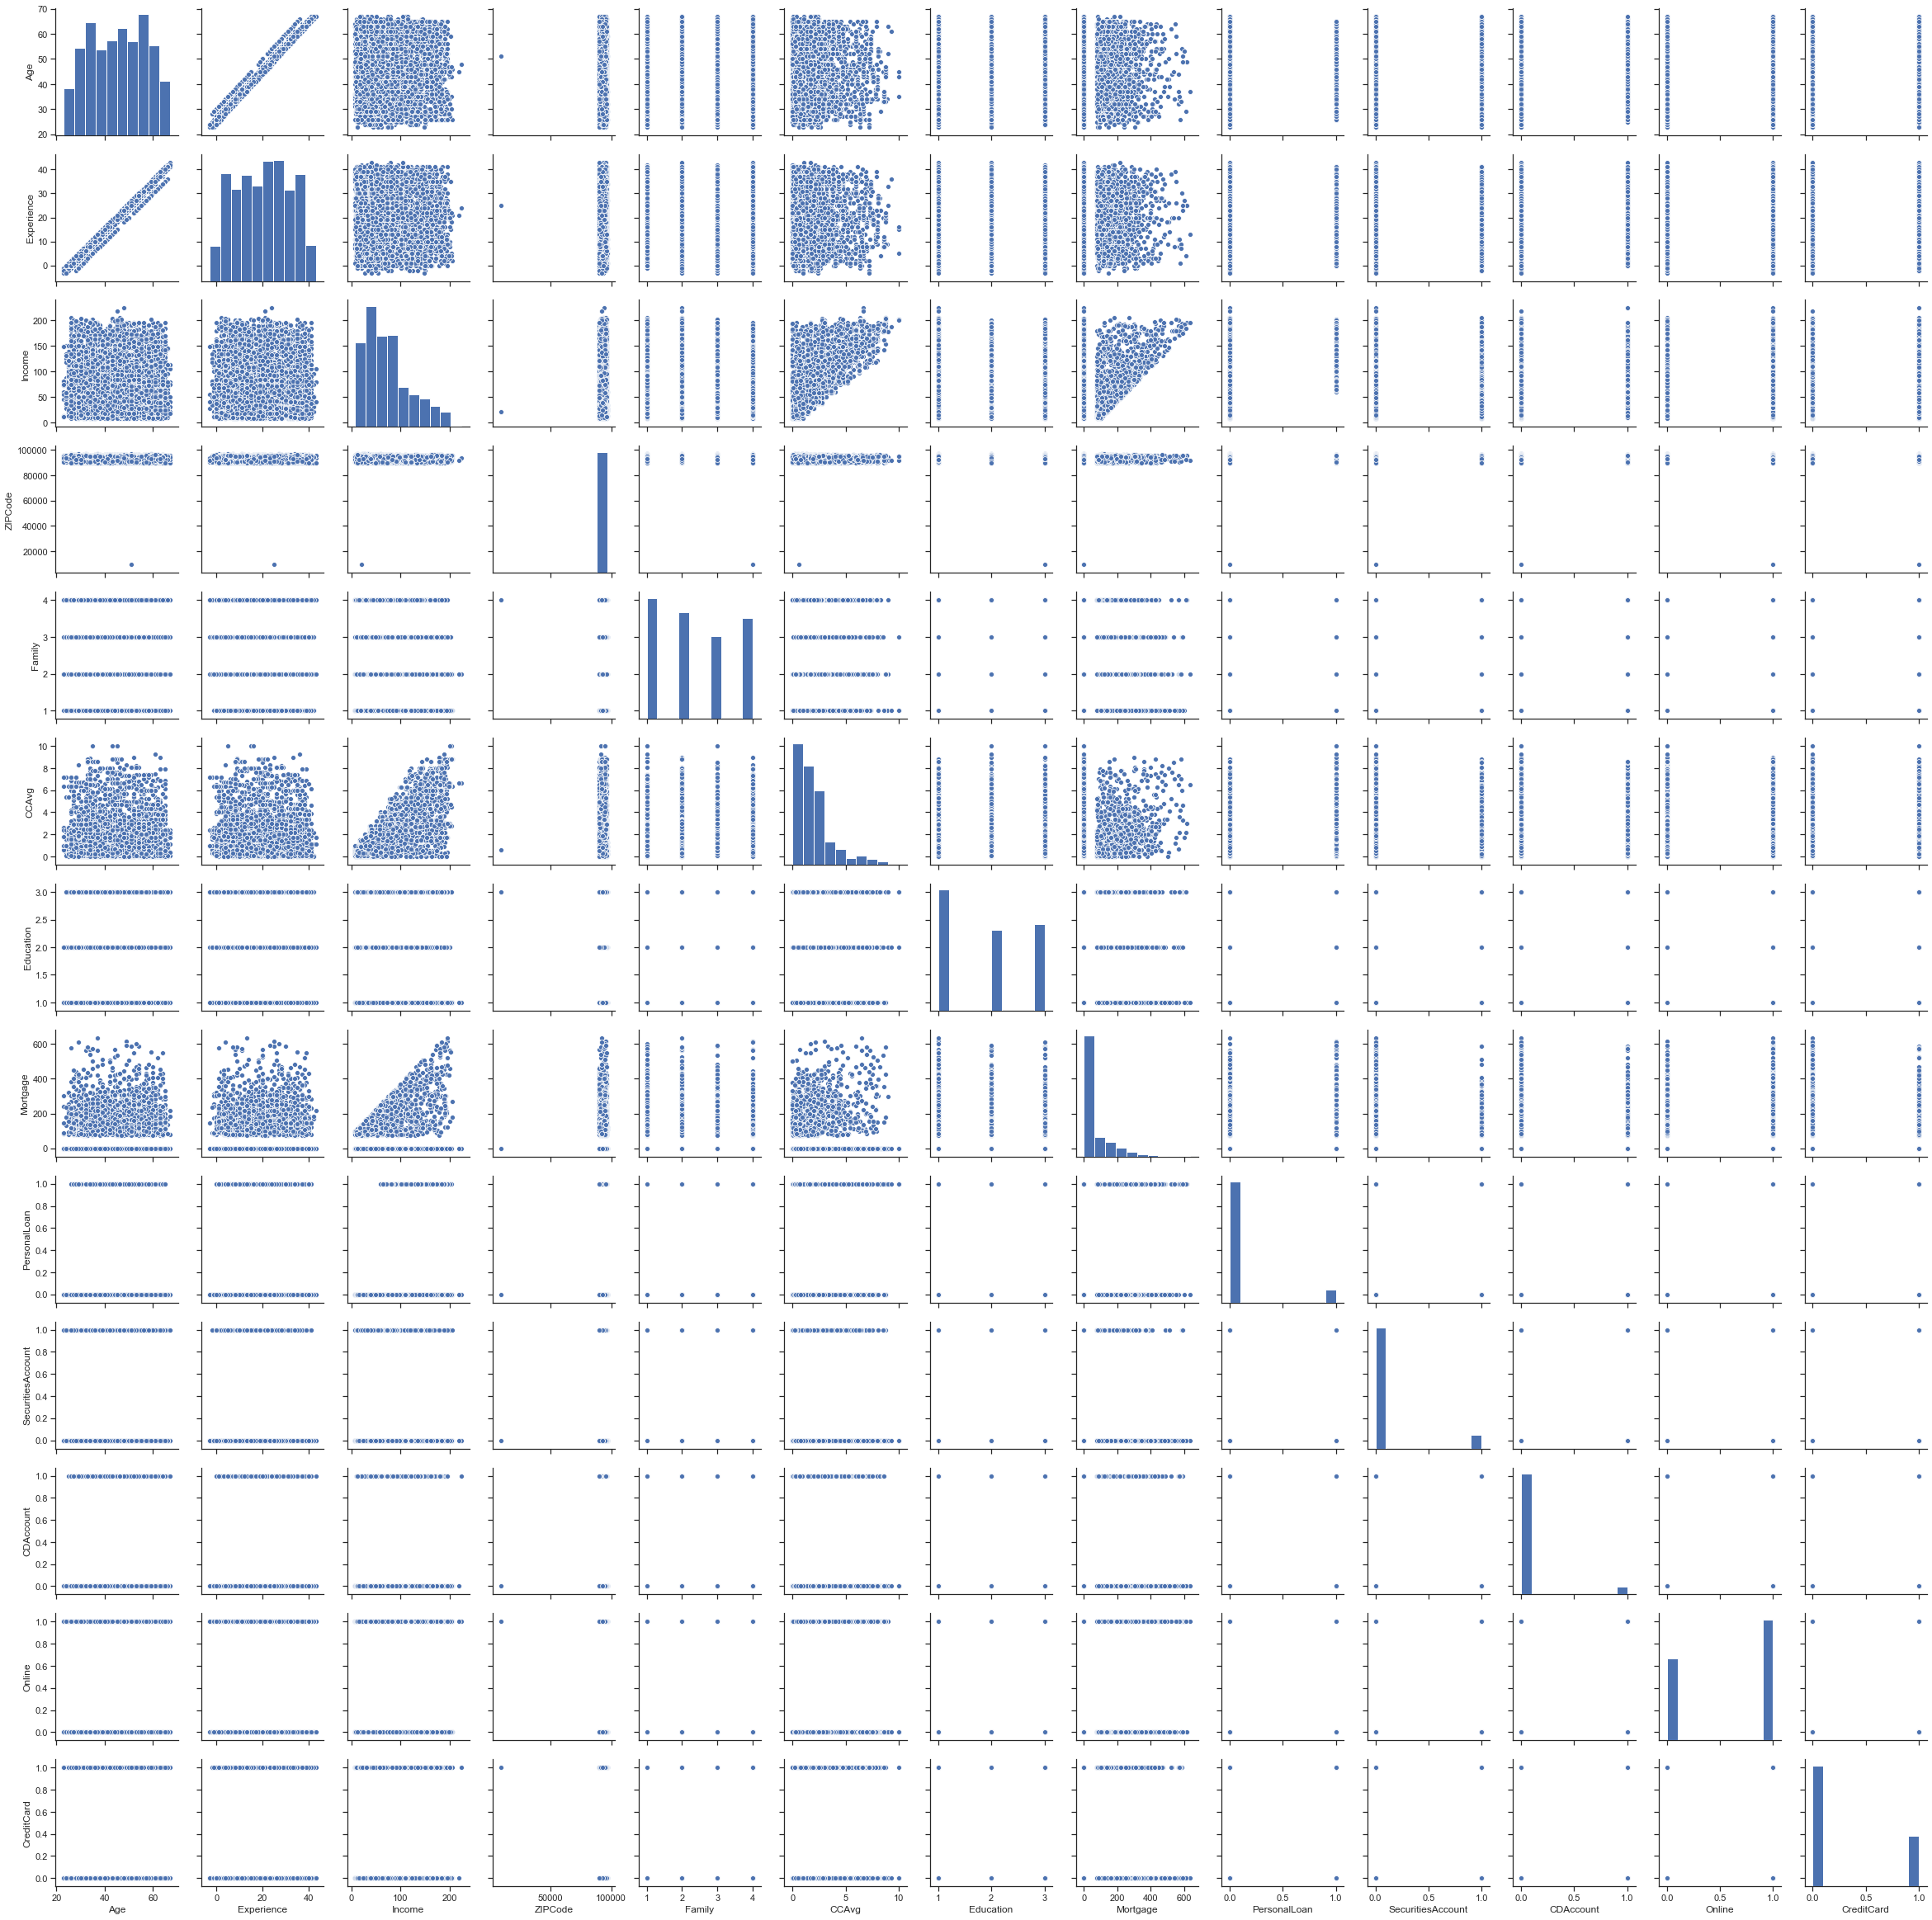

In [174]:
plt = sns.pairplot(Th[['Age','Experience','Income','ZIPCode','Family','CCAvg' ,'Education' , 'Mortgage','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']] )
Th.head(1)

Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values

In [175]:
Th[Th['Experience'] < 0]['Experience'].count()

52

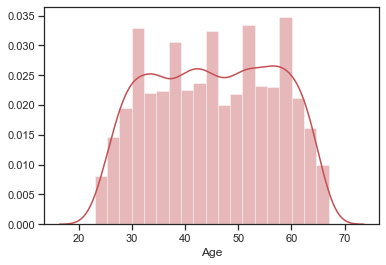

In [177]:
sns.distplot( Th['Age'], color = 'r')
plot.show()

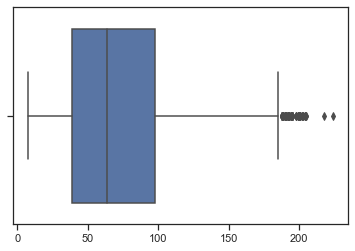

In [242]:
plt = sns.boxplot(Th[['Income']])

Most of the customers age fall in the age range of 30 to 60 yrs and their experience falls in the range of 5 to 35 years and most earn an income between 10K to 100K.

### Negative Experience cleaning

In [178]:
ThposExp = Th.loc[Th['Experience'] >0]
mask = Th.Experience < 0
column_name = 'Experience'
mylist = Th.loc[mask]['ID'].tolist()

In [179]:
for id in mylist:
    age = Th.loc[np.where(Th['ID']==id)]["Age"].tolist()[0]
    education = Th.loc[np.where(Th['ID']==id)]["Education"].tolist()[0]
    Th_filtered = ThposExp[(ThposExp.Age == age) & (ThposExp.Education == education)]
    exp = Th_filtered['Experience'].median()
    Th.loc[Th.loc[np.where(Th['ID']==id)].index, 'Experience'] = exp

In [180]:
Th.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,4971.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.243211,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.359189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Customer prefered personloan over education 

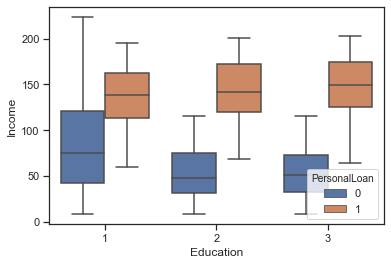

In [181]:
sns.boxplot(x="Education", y="Income", hue="PersonalLoan", data=Th)
plot.show()

The box plots show that those with education level 1 have higher incomes. But customers who go for personal loans have the same income distribution regardless of the education level.

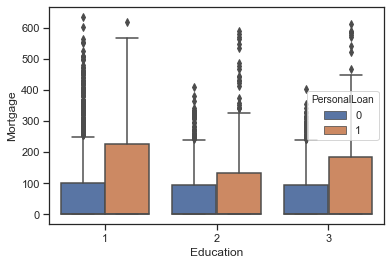

In [182]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=Th)
plot.show()

Customers who taken loan also have higher mortgages.

### Family size and Personalloan

In [243]:
familysize_no = np.mean( Th[Th.PersonalLoan == 0]['Family'] )
familysize_no

2.3734513274336284

In [244]:

familysize_yes = np.mean( Th[Th.PersonalLoan == 1]['Family'] )
familysize_yes

2.6125

In [245]:
from scipy import stats

stats.ttest_ind(Th[Th.PersonalLoan == 1]['Family'], Th[Th.PersonalLoan == 1]['Family'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

Family size seems to have no impact on decision to take a loan.

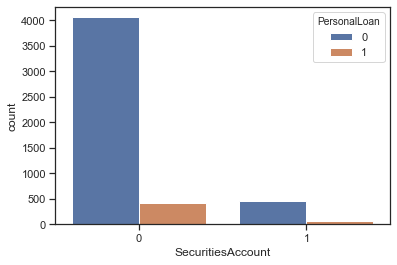

In [189]:
sns.countplot(x="SecuritiesAccount", data=Th,hue="PersonalLoan")
plot.show()

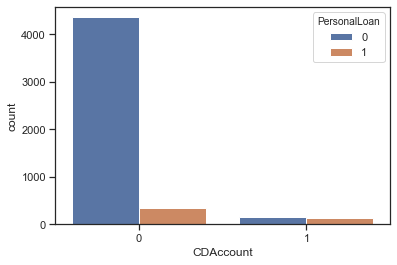

In [190]:
sns.countplot(x="CDAccount", data=Th,hue="PersonalLoan")
plot.show()

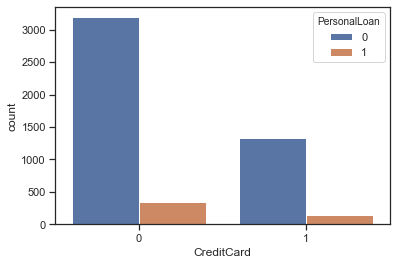

In [191]:
sns.countplot(x="CreditCard", data=Th,hue="PersonalLoan")
plot.show()

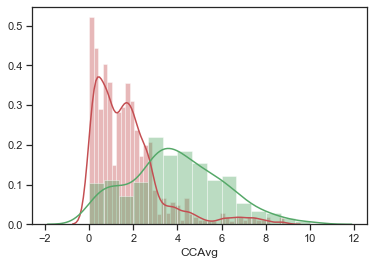

In [192]:
sns.distplot( Th[Th.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( Th[Th.PersonalLoan == 1]['CCAvg'], color = 'g')
plot.show()

Customers who have taken personal loan have higher credit card average than those who did nottake. So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

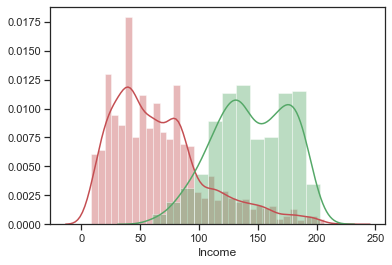

In [193]:
sns.distplot(Th[Th.PersonalLoan == 0]['Income'],color = 'r')
sns.distplot(Th[Th.PersonalLoan == 1]['Income'],color = 'g')
plot.show()

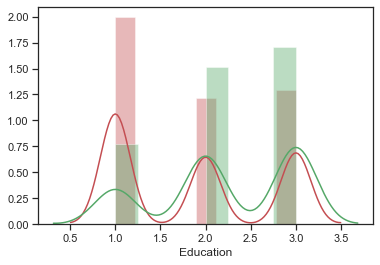

In [194]:
sns.distplot( Th[Th.PersonalLoan == 0]['Education'], color = 'r')
sns.distplot( Th[Th.PersonalLoan == 1]['Education'], color = 'g')
plot.show()

### Correlation comparison with heat map

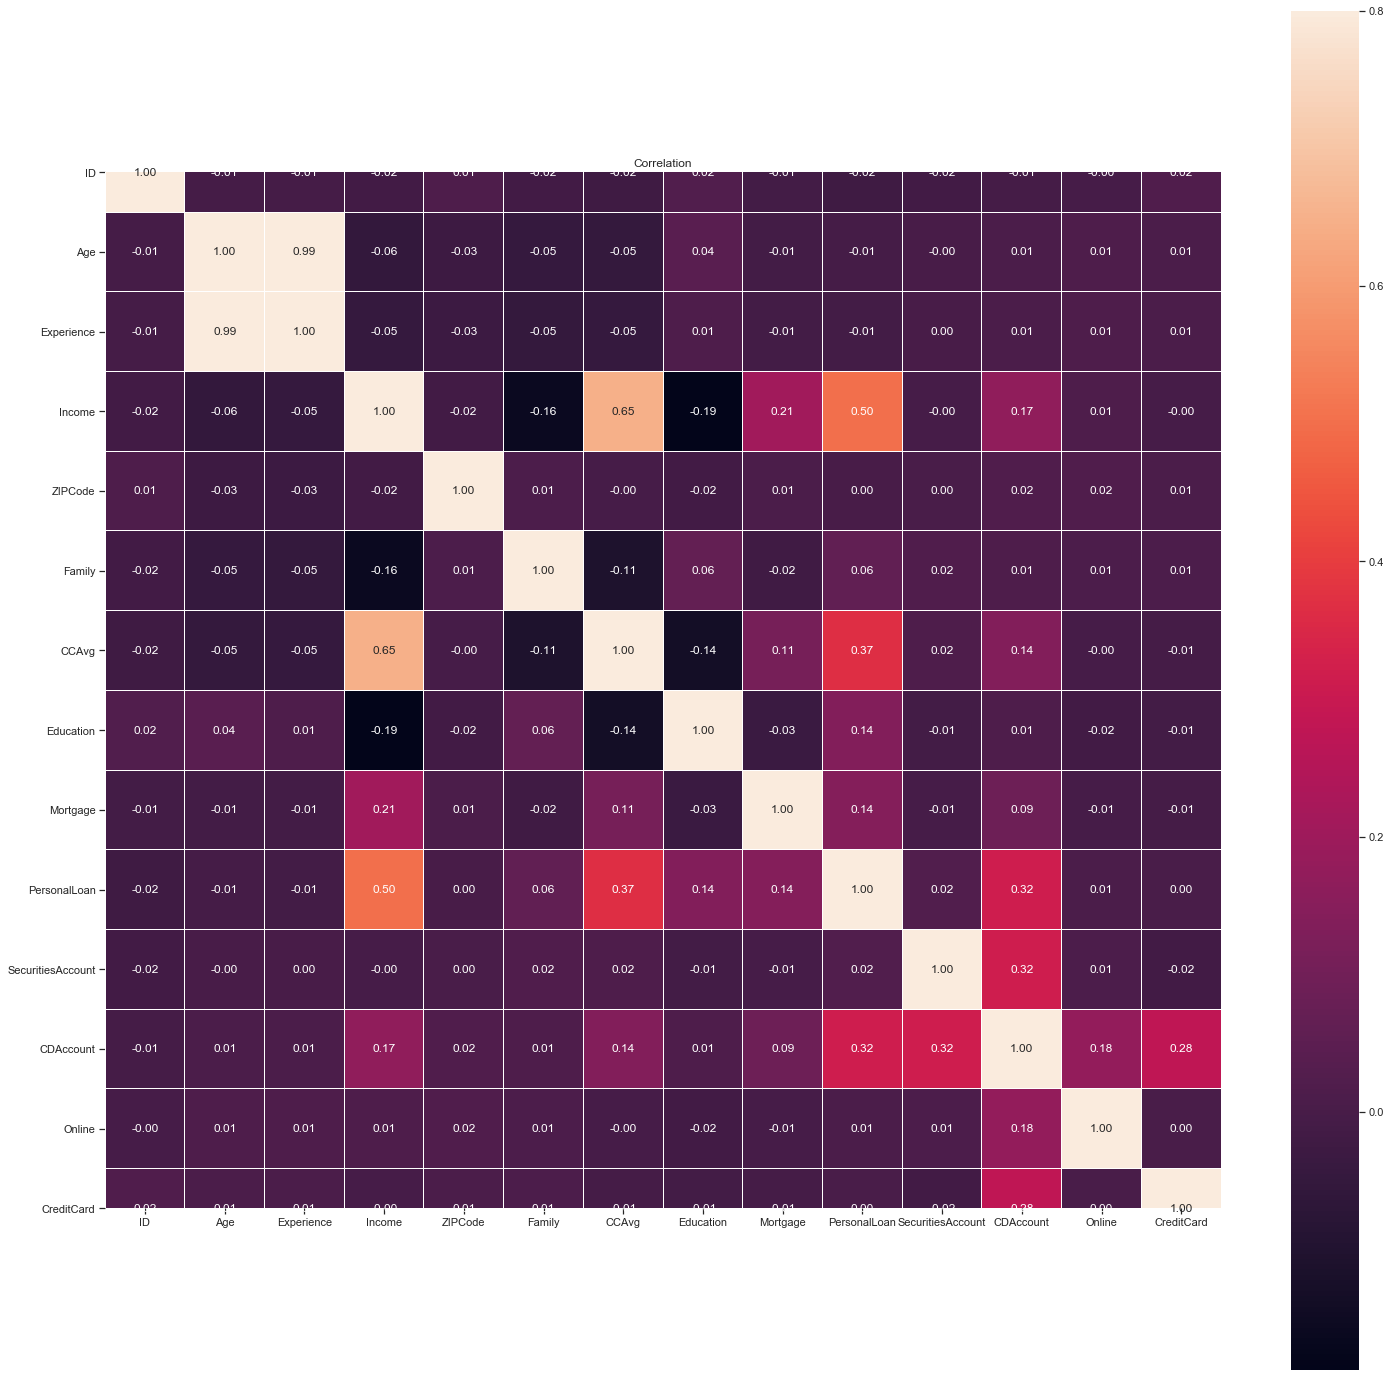

In [195]:
plot.figure(figsize=(25, 25))
ax = sns.heatmap(Th.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plot.title('Correlation')
plot.show()


1. Age and Experience is highly corelated
2. Income and CCAvg also corelated

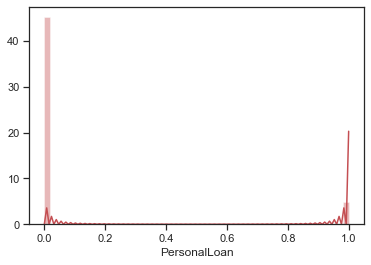

In [196]:
sns.distplot( Th['PersonalLoan'], color = 'r')
plot.show()

From the above distribution plot of target vaiable(PersonalLoan) it is clear that majority of customers didnt apply for personal loan i.e (0.0 distribution) as shown in the graph and less percenatge of customers interested for Personal Loan i.e (1.1 distribution) as shown in the graph. 

# 4. Splitting Data to Train And Test (70:30)

In [197]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Th.drop(['Experience' ,'ID' ,'CCAvg'], axis=1), test_size=0.3 , random_state=53)

In [198]:
train_set.describe()

,Age,Income,ZIPCode,Family,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.458286,73.814571,93176.260286,2.402857,1.890286,57.439714,0.094857,0.106857,0.061143,0.595714,0.296286
std,11.498213,45.987910,1739.659921,1.148576,0.840846,101.949410,0.293059,0.308976,0.239626,0.490823,0.456684
min,23.000000,8.000000,90005.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,92007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,64.000000,93407.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,99.000000,94608.000000,3.000000,3.000000,102.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [199]:
test_set.describe()


,Age,Income,ZIPCode,Family,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,45.058667,73.680000,93097.069333,2.381333,1.859333,54.303333,0.098667,0.098667,0.058667,0.599333,0.288667
std,11.379875,46.155684,2818.830809,1.145772,0.837465,101.161761,0.298313,0.298313,0.235078,0.490197,0.453294
min,23.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,91768.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,64.000000,93555.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,95.000000,94608.000000,3.000000,3.000000,97.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,205.000000,96651.000000,4.000000,3.000000,612.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [200]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
train_labels = train_set.pop("PersonalLoan")
test_labels = test_set.pop("PersonalLoan")

# 5.Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

# Logistic Regression

In [201]:
#df1=df.values # convert the data frame to a numpy array
#print(type(df1))
#print(df1)

In [202]:
#print(df1.shape)
#df1=df1[:,1:]
#print(df1.shape)

In [203]:
from sklearn.linear_model import LogisticRegression

In [204]:
log_reg=LogisticRegression()

In [205]:
lm=log_reg.fit(train_set, train_labels)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [206]:
log_reg.score(train_set, train_labels)

0.9074285714285715

In [207]:
log_reg.score(test_set,test_labels)

0.9113333333333333

In [208]:
y_pred=log_reg.predict(test_set)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [227]:
score =accuracy_score(test_labels,y_pred)
score

0.9113333333333333

# Naive Bayes

In [228]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
Na=naive_model.score(test_set,test_labels)

In [229]:
print(Na)

0.9166666666666666


In [230]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(test_labels, prediction).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1296,69
Yes,56,79


# KNeighborsClassifier

In [231]:
train_set_indep = Th.drop(['Experience' ,'ID' ,'CCAvg'] , axis = 1).drop(labels= "PersonalLoan" , axis = 1)
train_set_indep_z = train_set_indep.apply(zscore)
train_set_dep = Th["PersonalLoan"]
X = np.array(train_set_indep_z)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [232]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)

In [233]:
print(acc)

0.9446297531687792


# 6. Print the confusion matrix for all the above models

In [234]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

# Confusion matrix for Naive Bayes

In [235]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(test_labels, prediction).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1296,69
Yes,56,79


# Confusion matrix for KNN

In [236]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_Test, predicted))

[[1366    7]
 [  76   50]]


# Confusion matrix for Logistic Regression

In [237]:
from sklearn import metrics
print(metrics.confusion_matrix(test_labels,y_pred))

[[1313   39]
 [  94   54]]


# 7. Give your reasoning on which is the best model in this case and why it performs better? 

In [238]:
print(" Accuracy of Logistic Regression is :",score)

 Accuracy of Logistic Regression is : 0.9113333333333333


In [239]:
print(" Accuracy of KNN is :",acc)

 Accuracy of KNN is : 0.9446297531687792


In [226]:
print(" Accuracy of Naive Bayes is :",Na)

 Accuracy of Naive Bayes is : 0.9166666666666666


# From the above study , it seems like KNN algorithm have the highest accuracy and we can choose that as our final model.

The aim of the Thera bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Four classification algorithms were used in this study. From the above study , it seems like KNN algorithm have the highest accuracy and we can choose that as our final model and ir perform better because of of the findings of nearest dataset behavior process.

In case of KNN classification, a majority voting is applied over the k nearest datapoints whereas, in KNN regression, mean of k nearest datapoints is calculated as the output. As a rule of thumb, we selects odd numbers as k. KNN is a lazy learning model where the computations happens only runtime.

Loss function : There is no training involved in KNN. During testing, k neighbors with minimum distance, will take part in classification /regression.
Advantages :
Easy and simple machine learning model.
Few hyperparameters to tune.